<img src="newlogomioti.png" style="height: 100px">   
<br />
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>

# Worksheet S3: Detección de anomalías

## Objetivos

El objetivo de este worksheet es que aprendas a utilizar técnicas para detección de anomalías (anomaly detection, AD), es decir, técnicas utilizadas para identificas patrones inusuales en el comportamiento esperado en diferentes sistemas, a través de los datos generados.

Tiene múltiples aplicaciones en negocio, desde detección de intrusos en redes que podrían indicar la presencia de hackers a sistemas de monitorización en salud (por ejemplo indicando un tumor maligno en un scanner), a detección de fraude en tarjetas de crédito.

An outlier is an observation in a data set which appears to be inconsistent with the remainder of that set of data. Johnson 1992.

An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism. Outlier/Anomaly Hawkins 1980.

<img src="outliers-network.png" width="40%">

### Tipos de herramientas y entornos en detección de anomalías

#### AD supervisada
Las etiquetas están disponibles, tanto para casos normales como para casos anómalos.
En cierto modo, similar a minería de clases poco comunes o clasificación no balanceada.
#### AD Semi-supervisada (detección de novedades, Novelty Detection)
Durante el entrenamiento, solo tenemos datos normales.
El algoritmo aprende únicamente usando los datos normales.
#### AD no supervisada (detección de outliers, Outlier Detection)
No hay etiquetas y el conjunto de entrenamiento tiene datos normales y datos anómalos.
Asunción: los datos anómalos son poco frecuentes.

## Configuración del entorno

In [24]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
import sklearn

## Una aproximación sencilla

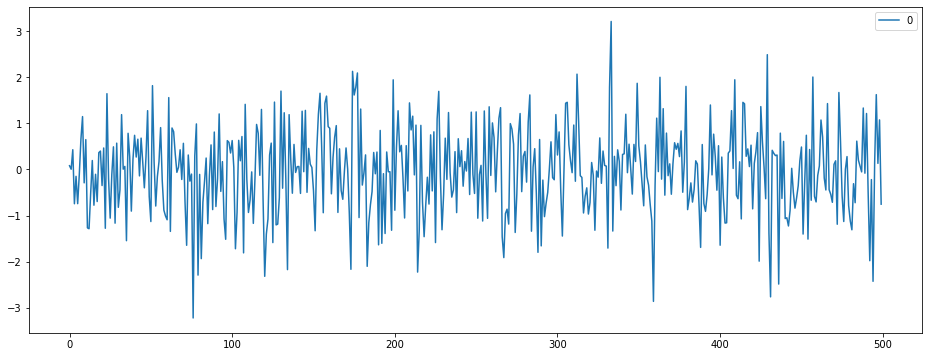

In [26]:
data = pd.DataFrame(np.random.randn(500))
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13354f0d0>]],
      dtype=object)

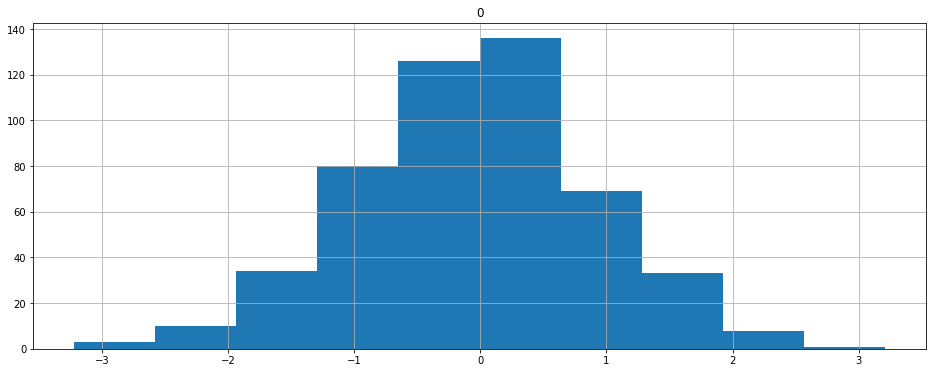

In [27]:
data.hist()

In [28]:
data.std()

0    0.949224
dtype: float64

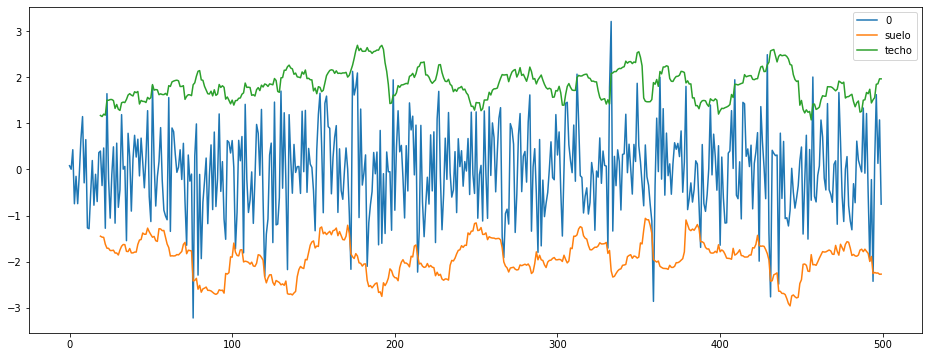

In [29]:
wind = 20
sigma = 2

data["suelo"] = data[0].rolling(window=wind)\
    .mean() - (sigma * data[0].rolling(window=wind).std())
data["techo"] = data[0].rolling(window=wind)\
    .mean() + (sigma * data[0].rolling(window=wind).std())
data.plot()

In [30]:
data["anom"] = data.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

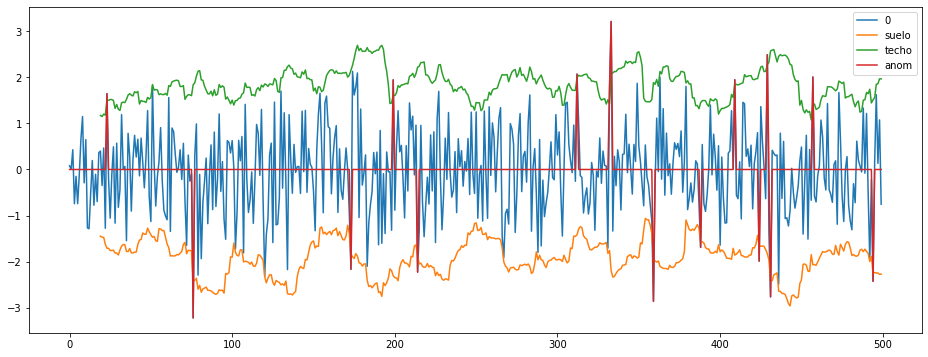

In [31]:
data.plot()

# Probando con datos reales

In [35]:
data= pd.read_csv('Indicadores_BKT.csv', sep=',', index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2783 entries, 2008-01-02 to 2018-11-20
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2783 non-null   float64
 1   High                   2783 non-null   float64
 2   Low                    2783 non-null   float64
 3   Close                  2783 non-null   float64
 4   Adj Close              2783 non-null   float64
 5   Volume                 2783 non-null   int64  
 6   volume_adi             2783 non-null   float64
 7   volume_obv             2783 non-null   int64  
 8   volume_obvm            2783 non-null   float64
 9   volume_cmf             2783 non-null   float64
 10  volume_fi              2783 non-null   float64
 11  volume_em              2783 non-null   float64
 12  volume_vpt             2783 non-null   float64
 13  volume_nvi             2783 non-null   float64
 14  volatility_atr         2783 non-null   float64

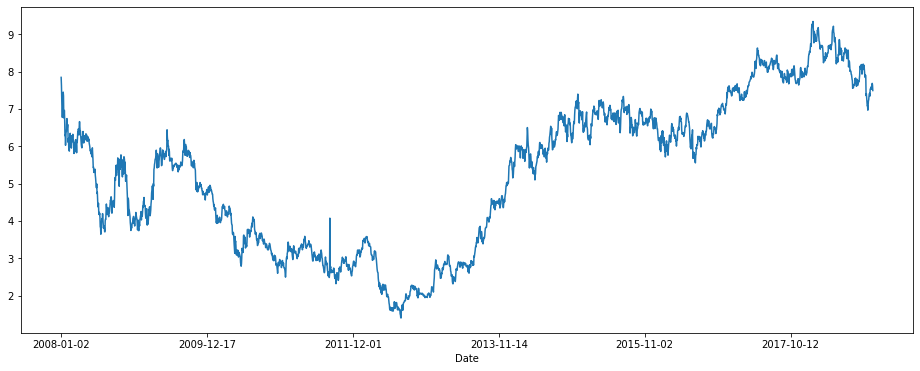

In [36]:
data['Close'].plot()

In [37]:
data=data['2018-01-02':]

In [38]:
data

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_obvm,volume_cmf,...,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,7.900,7.963,7.855,7.953,7.862813,1439954,1.281255e+06,1439954,127252.4,-0.242089,...,30.182824,1.767302,62.670808,40.808824,33.578431,-59.191176,0.051921,0.619939,0.618026,1.383522
2018-01-03,7.966,7.990,7.932,7.964,7.873688,1198692,1.297298e+06,1198692,541438.8,-0.159621,...,43.006878,1.874987,61.002982,44.852941,36.151961,-55.147059,0.036429,0.138313,0.138217,1.523749
2018-01-04,7.990,8.098,7.964,8.082,7.990349,2076404,1.704549e+06,2076404,560015.5,-0.121870,...,53.949323,2.476041,61.364571,88.235294,57.965686,-11.764706,0.044141,1.481668,1.470798,3.027993
2018-01-05,8.100,8.164,8.050,8.140,8.047692,1431395,2.409249e+06,1431395,562478.4,-0.056489,...,60.512287,3.264438,65.729631,92.546584,75.211606,-7.453416,0.065821,0.717644,0.715081,3.767367
2018-01-08,8.144,8.210,8.124,8.124,8.031873,1247038,-4.183356e+05,-1247038,291455.8,-0.059617,...,61.340304,3.902819,62.769822,76.630435,85.804104,-23.369565,0.107309,-0.196560,-0.196754,3.563402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-14,7.548,7.588,7.476,7.540,7.540000,1502399,9.707340e+05,-1502399,935398.4,-0.105064,...,75.438568,-12.858477,55.325647,76.404494,78.052434,-23.595506,-0.093000,-0.737230,-0.739961,-3.881333
2018-11-15,7.550,7.626,7.500,7.586,7.586000,1428151,7.360169e+05,1428151,918283.9,-0.027608,...,83.788801,-12.209956,56.409141,79.601990,79.567705,-20.398010,-0.074171,0.610080,0.608226,-3.294933
2018-11-16,7.630,7.718,7.546,7.684,7.684000,2682391,2.143299e+06,2682391,902166.8,-0.047713,...,84.251760,-11.258803,63.594702,90.207715,82.071400,-9.792285,-0.036535,1.291853,1.283580,-2.045645


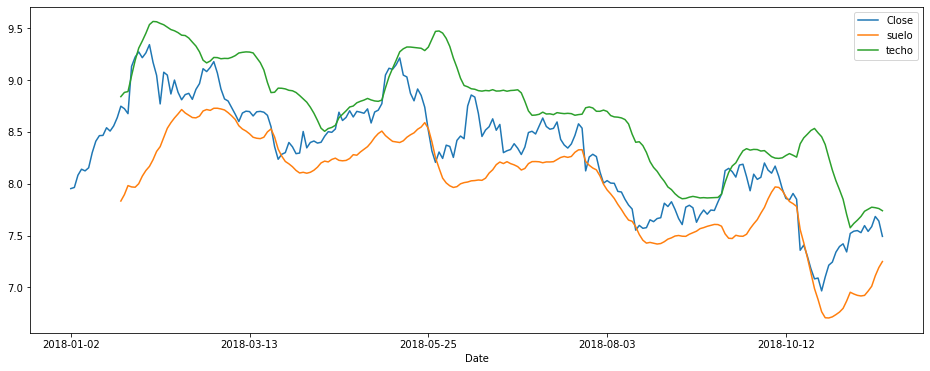

In [39]:
wind = 15
sigma = 2

data["suelo"] = data['Close'].rolling(window=wind)\
    .mean() - (sigma * data['Close'].rolling(window=wind).std())
data["techo"] = data['Close'].rolling(window=wind)\
    .mean() + (sigma * data['Close'].rolling(window=wind).std())
data[['Close','suelo','techo']].plot()

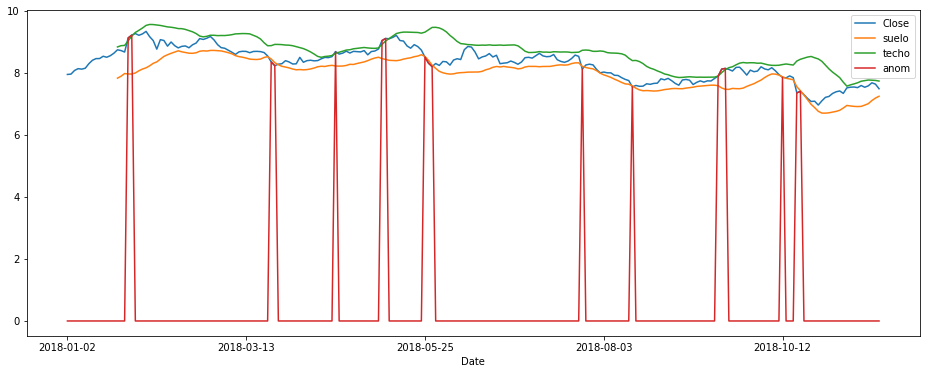

In [40]:
data["anom"] = data.apply(
    lambda row: row["Close"] if (row["Close"]<=row["suelo"] or row["Close"]>=row["techo"]) else 0, axis=1)

data[['Close','suelo','techo','anom']].plot()

## Generando un dataset de trabajo

Vamos a familiarizarnos con la detección de anomalías no supervisada. Para visualizar la salida de los distintos algoritmos, vamos a considerar un dataset bidimensional que consiste en una mixtura de datos de distribuciones normales.

In [43]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, centers=3, n_samples=500,
                  random_state=666)

In [44]:
X.shape

(500, 2)

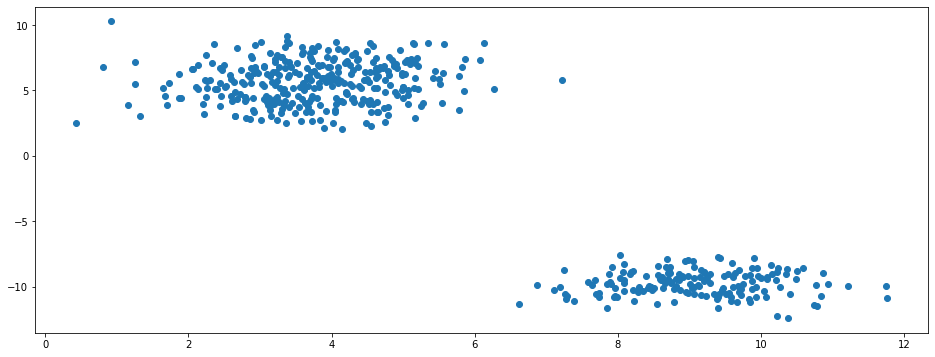

In [45]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Detección de anomalías con estimación de densidad



In [46]:
from sklearn.neighbors.kde import KernelDensity

# Estimador de densidad Gaussiano
kde = KernelDensity(kernel='gaussian')
kde = kde.fit(X)
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [48]:
kde_X = kde.score_samples(X)
print(kde_X.shape)  # nos proporciona la verosimilitud de los datos. Cuanto más baja, más anómalo

(500,)


In [49]:
from scipy.stats.mstats import mquantiles
alpha_set = 0.95
tau_kde = mquantiles(kde_X, 1. - alpha_set)

In [50]:
n_samples, n_features = X.shape
X_range = np.zeros((n_features, 2))
X_range[:, 0] = np.min(X, axis=0) - 1.
X_range[:, 1] = np.max(X, axis=0) + 1.

h = 0.1  # Tamaño de paso de la rejilla
x_min, x_max = X_range[0]
y_min, y_max = X_range[1]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]

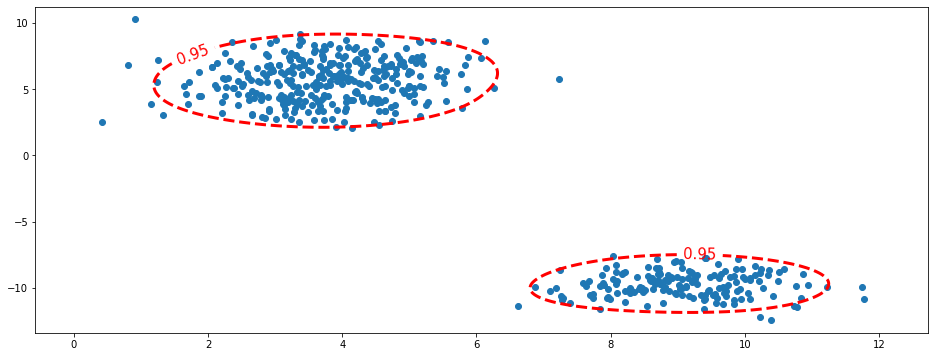

In [51]:
Z_kde = kde.score_samples(grid)
Z_kde = Z_kde.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx, yy, Z_kde, levels=tau_kde, colors='red', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=15, fmt={tau_kde[0]: str(alpha_set)})
plt.scatter(X[:, 0], X[:, 1])
#plt.legend()
plt.show()

## One-Class SVM
El problema de usar la estimación de densidad es que es ineficiente cuando la dimensionalidad de los datos es demasiado alta. El algoritmo one-class SVM si que puede utilizarse en estos casos.

In [53]:
from sklearn.svm import OneClassSVM

In [78]:
nu = 0.05  # Resultados teóricos dicen que hay un 5% de datos anómalos
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # gamma nos suaviza los bordes , equivalente a la ventana de arriba (kernel)
ocsvm.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

In [79]:
X_outliers = X[ocsvm.predict(X) == -1]

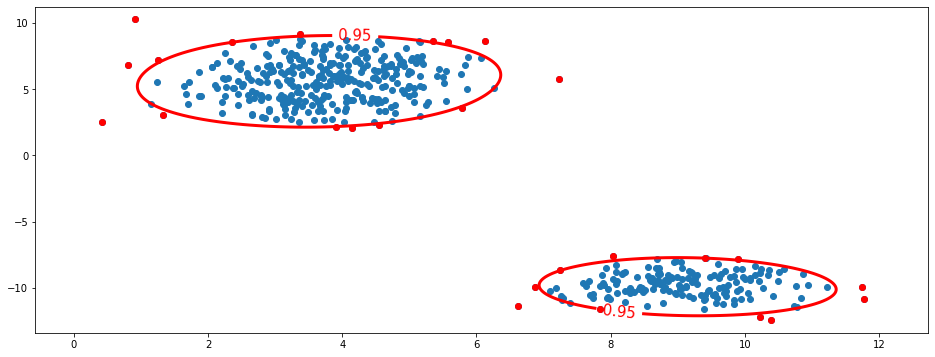

In [80]:
Z_ocsvm = ocsvm.decision_function(grid)
Z_ocsvm = Z_ocsvm.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx, yy, Z_ocsvm, levels=[0], colors='red', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=15, fmt={0: str(alpha_set)})
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
#plt.legend()
plt.show()

### Vectores soporte o outliers
En el one-class SVM, no todos los vectores soporte son outliers:

In [81]:
X_SV = X[ocsvm.support_]
n_SV = len(X_SV)
n_outliers = len(X_outliers)

print('{0:.2f} <= {1:.2f} <= {2:.2f}?'.format(1./n_samples*n_outliers, nu, 1./n_samples*n_SV))

0.05 <= 0.05 <= 0.06?


Solo los vectores soporte sirven a la hora de calcular la función de decisión del One-Class SVM.

Ahora vamos a representar la función de decisión del One-Class SVM como hicimos con la densidad y vamos a marcar los vectores soporte.

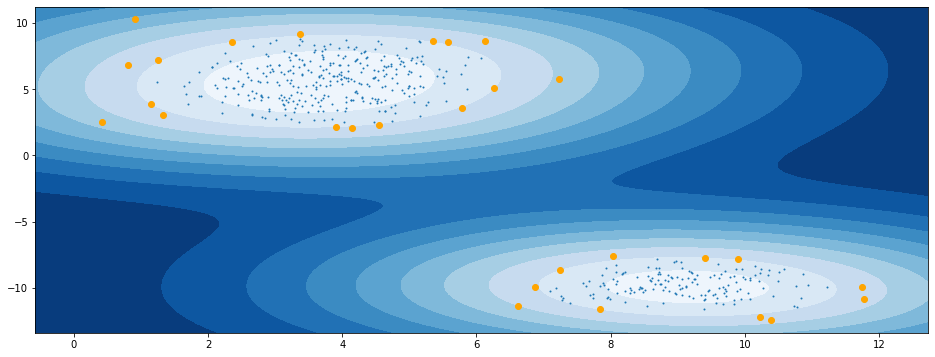

In [82]:
plt.figure()
plt.contourf(xx, yy, Z_ocsvm, 10, cmap=plt.cm.Blues_r)
plt.scatter(X[:, 0], X[:, 1], s=1.)
plt.scatter(X_SV[:, 0], X_SV[:, 1], color='orange')
plt.show()

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      **Cambia** el parámetro `gamma` y comprueba como afecta la función de decisión.
      </li>
    </ul>
</div>

## Isolation Forest
El algoritmo Isolation Forest es un algoritmo de AD basado en árboles. Construye un determinado número de árboles aleatorios y su idea principal es que si un ejemplo es una anomalía, entonces debería aparecer aislado en la hoja de un árbol tras algunas particiones. El Isolation Forest deriva una puntuación de anormalidad basada en la profundidad del árbol en la cuál términos los ejemplos anómalos.

In [83]:
from sklearn.ensemble import IsolationForest

In [151]:
iforest = IsolationForest(n_estimators=300, contamination=0.10)
iforest = iforest.fit(X)

No handles with labels found to put in legend.


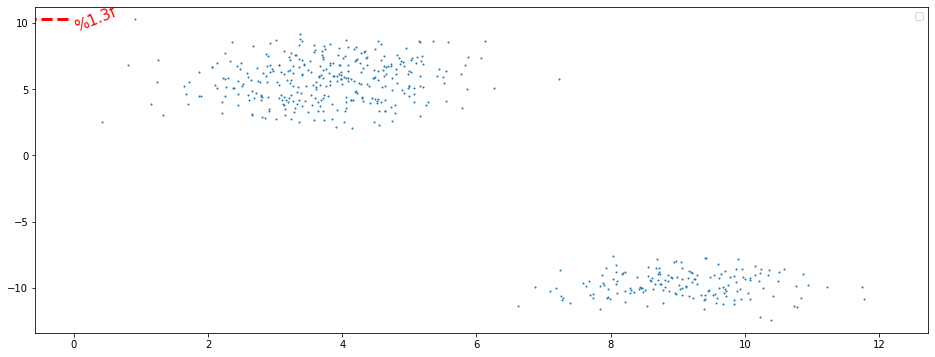

In [97]:
Z_iforest = iforest.decision_function(grid)
Z_iforest = Z_iforest.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx, yy, Z_iforest,
                levels=[iforest._max_features],
                  colors='red', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=15,
           fmt={iforest._max_features: str(alpha_set)})
plt.scatter(X[:, 0], X[:, 1], s=1.)
plt.legend()
plt.show()

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Ilustra gráficamente la influencia del número de árboles en la suavidad de la función de decisión
      </li>
    </ul>
</div>

### Aplicación al dataset de dígitos
Ahora vamos a aplicar el IsolationForest para intentar localizar dígitos que han sido escritos de modo poco convencional.

In [98]:
from sklearn import datasets
digits = datasets.load_digits()

El algoritmo *Isolation Forest* es un algoritmo de AD basado en árboles. Construye un determinado número de árboles aleatorios y su idea principal es que si un ejemplo es una anomalía, entonces debería aparecer aislado en la hoja de un árbol tras algunas particiones. El *Isolation Forest* deriva una puntuación de anormalidad basada en la profundidad del árbol en la cuál términos los ejemplos anómalos.

In [140]:
images = digits.images
labels = digits.target
images.shape

(1797, 8, 8)

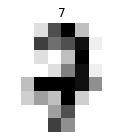

In [146]:
i = 108

plt.figure(figsize=(2, 2))
plt.title('{0}'.format(labels[i]))
plt.axis('off')
plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Para usar las imágenes como patrones de entrenamiento, tenemos que pasarlas a vector:

In [142]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [145]:
data.shape

(1797, 64)

In [147]:
X = data
y = digits.target

In [144]:
X.shape

(1797, 64)

Vamos a centrarnos en el dígito 5.

In [148]:
X_7 = X[y == 7]

In [149]:
X_7.shape

(179, 64)

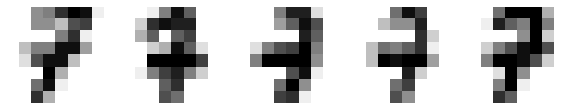

In [150]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, x in zip(axes, X_7[:5]):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

Vamos a usar ``IsolationForest`` para encontrar el 5% de imágenes más anómalas y representarlas:

In [134]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.05)
iforest = iforest.fit(X_7)

Sacamos el grado de anormalidad utilizando `iforest.decision_function`. Cuanto más bajo, más anómalo.

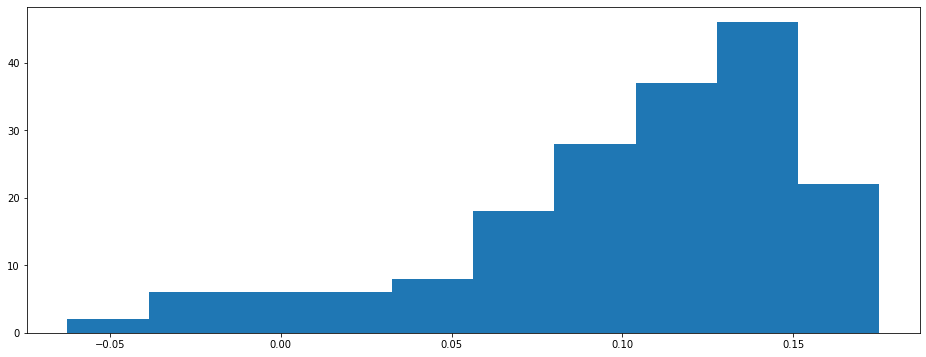

In [139]:
iforest_X = iforest.decision_function(X_7)
plt.hist(iforest_X);


Dibujemos los 10 ejemplos más "normales" (*inliers*):

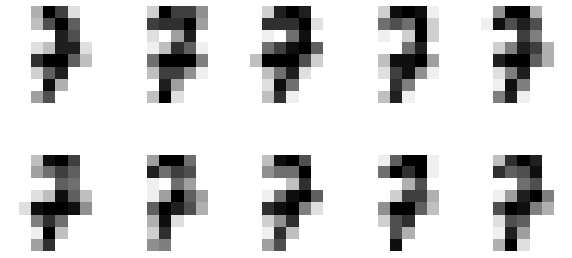

In [136]:
X_strong_inliers = X_7[np.argsort(iforest_X)[-10:]]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in zip(range(len(X_strong_inliers)), axes.ravel()):
    ax.imshow(X_strong_inliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

Ahora vamos a dibujar los *outliers*:

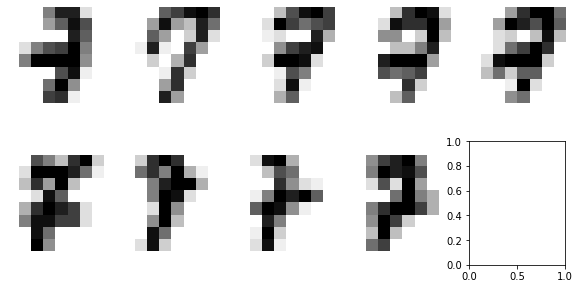

In [138]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

X_outliers = X_7[iforest.predict(X_7) == -1]

for i, ax in zip(range(len(X_outliers)), axes.ravel()):
    ax.imshow(X_outliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Haz lo mismo pero para los dígitos 9 y 7.
      </li>
    </ul>
</div>